In [1]:
sys.path.insert(0, './common')

import sys
import cartpole
import ppo_model

c:\Users\nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\wrappers\monitoring\video_recorder.py:9: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils.spawn


In [2]:
env_path = 'velocity/Wave'

In [2]:
env = cartpole.CartPoleEnv()

CARTPOLE environment created.


In [3]:
hidden_layer = 50
model = ppo_model.PPO(4, 2, hidden_layer, lr=1e-3)
save_path = './results/cartpole/ppo'
model.set_model_save_path(save_path)

In [5]:
model.load_model()

No model available
Error load training history ./results/velocity/ppo/train_rewards.csv not found.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


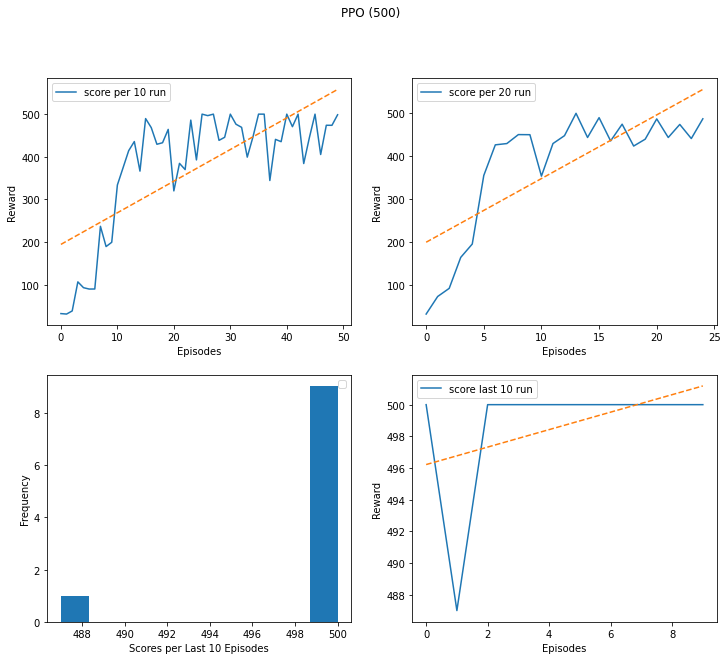

EPOCH: 499, total reward: 500.0, timestep: 500


In [4]:
model.set_train_params(max_step=500, plot_smooth=10)
model.train(env, 500, show_plot=True)

In [7]:
model.save_model()

Model saved
Training history saved


In [3]:
import saver
saver.save_wave_model(hidden_layer, f'{save_path}/actor.pth', f'{save_path}/model.onnx')

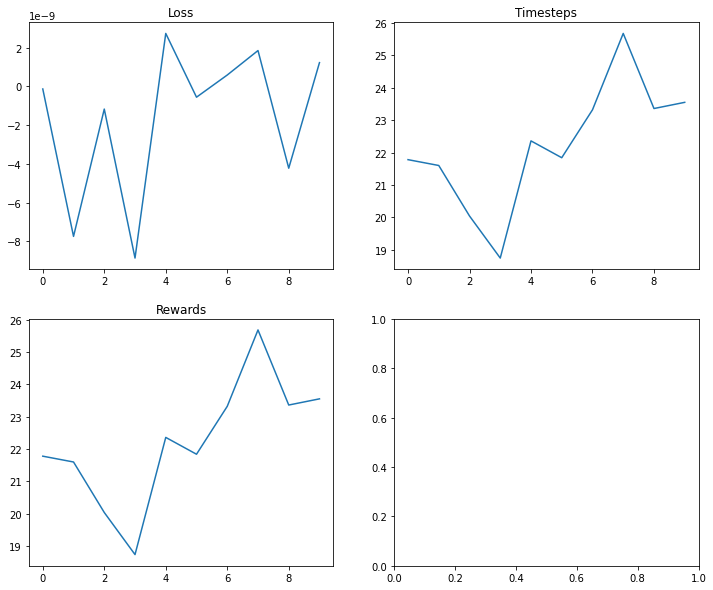

In [5]:
model.plot_train_memory(smooth=50)

In [48]:
env = cartpole.CartPoleEnv()
model.test(env)

CARTPOLE environment created.


(213.0, 213)

In [49]:
model.test_avg(lambda time_scale: cartpole.CartPoleEnv(), 10, 40)

CARTPOLE environment created.
CARTPOLE environment created.
CARTPOLE environment created.
CARTPOLE environment created.
CARTPOLE environment created.
CARTPOLE environment created.
CARTPOLE environment created.
CARTPOLE environment created.
CARTPOLE environment created.
CARTPOLE environment created.


(206.7, 206.7)

In [6]:
env.close()